In [1]:
# 早在1992年，Fama发现小市值股票总体比大市值股票收益率更高，并将市值因子加入CAPM模型中，形成三因子模型
# 选取沪深300中市值最大、最小的50只股票，计算两组股票从2019年1月到12月的月平均收益率

In [2]:
# 筛选出市值最大的50只股票
stocks=index_components('000300.XSHG')
q=query(fundamentals.eod_derivative_indicator.market_cap).filter(
fundamentals.eod_derivative_indicator.stockcode.in_(stocks)).order_by(
fundamentals.eod_derivative_indicator.market_cap.desc()).limit(50)
upper50=get_fundamentals(q, '2019-01-01', expect_df=True).index

In [3]:
upper50.levels[0]

Index(['000001.XSHE', '000002.XSHE', '000333.XSHE', '000651.XSHE',
       '000858.XSHE', '001979.XSHE', '002304.XSHE', '002352.XSHE',
       '002415.XSHE', '002594.XSHE', '300498.XSHE', '600000.XSHG',
       '600016.XSHG', '600019.XSHG', '600028.XSHG', '600030.XSHG',
       '600036.XSHG', '600048.XSHG', '600050.XSHG', '600104.XSHG',
       '600276.XSHG', '600519.XSHG', '600585.XSHG', '600887.XSHG',
       '600900.XSHG', '601088.XSHG', '601138.XSHG', '601166.XSHG',
       '601186.XSHG', '601211.XSHG', '601288.XSHG', '601318.XSHG',
       '601319.XSHG', '601328.XSHG', '601336.XSHG', '601360.XSHG',
       '601390.XSHG', '601398.XSHG', '601601.XSHG', '601628.XSHG',
       '601668.XSHG', '601688.XSHG', '601766.XSHG', '601800.XSHG',
       '601818.XSHG', '601857.XSHG', '601939.XSHG', '601988.XSHG',
       '601998.XSHG', '603288.XSHG'],
      dtype='object', name='order_book_id')

In [4]:
# 筛选出市值最小的50只股票
q=query(fundamentals.eod_derivative_indicator.market_cap).filter(
fundamentals.eod_derivative_indicator.stockcode.in_(stocks)).order_by(
fundamentals.eod_derivative_indicator.market_cap.asc()).limit(50)
lower50=get_fundamentals(q, '2019-01-01', expect_df=True).index

In [5]:
lower50.levels[0]

Index(['000415.XSHE', '000630.XSHE', '000671.XSHE', '000723.XSHE',
       '000728.XSHE', '000786.XSHE', '000961.XSHE', '002010.XSHE',
       '002081.XSHE', '002241.XSHE', '002271.XSHE', '002294.XSHE',
       '002410.XSHE', '002456.XSHE', '002468.XSHE', '002508.XSHE',
       '002555.XSHE', '002601.XSHE', '002607.XSHE', '002773.XSHE',
       '002916.XSHE', '300017.XSHE', '300024.XSHE', '300033.XSHE',
       '300070.XSHE', '300136.XSHE', '300347.XSHE', '600004.XSHG',
       '600038.XSHG', '600109.XSHG', '600118.XSHG', '600153.XSHG',
       '600183.XSHG', '600208.XSHG', '600219.XSHG', '600369.XSHG',
       '600372.XSHG', '600522.XSHG', '600583.XSHG', '600816.XSHG',
       '600848.XSHG', '601212.XSHG', '601216.XSHG', '601555.XSHG',
       '601878.XSHG', '601997.XSHG', '603019.XSHG', '603501.XSHG',
       '603799.XSHG', '603986.XSHG'],
      dtype='object', name='order_book_id')

In [6]:
# 查找两组股票的收盘价
price_upper50=get_price(upper50.levels[0], '2019-01-01', '2019-12-31', fields='close')
price_lower50=get_price(lower50.levels[0], '2019-01-01', '2019-12-31', fields='close')

In [7]:
# 处理缺失值
import pandas as pd
na_count_upper50=pd.DataFrame(price_upper50.isna().sum())
na_conrt_lower50=pd.DataFrame(price_lower50.isna().sum())

In [8]:
na_count_upper50.sum()

0    0
dtype: int64

In [9]:
na_conrt_lower50.sum()

0    0
dtype: int64

In [10]:
# 创建月首月末日期范围
from datetime import datetime, timedelta
monthBegin=pd.date_range('20190101', '20191231', freq='MS').to_list()
monthEnd=pd.date_range('20190101', '20191231', freq='M').to_list()

In [12]:
# 转为交易日
tradeDates=price_upper50.index

for i in range(len(monthBegin)):
    while monthBegin[i] not in tradeDates:
        monthBegin[i]+=timedelta(days=1)

for i in range(len(monthEnd)):
    while monthEnd[i] not in tradeDates:
        monthEnd[i]-=timedelta(days=1)

In [13]:
print(monthBegin)
print(monthEnd)

[Timestamp('2019-01-02 00:00:00', freq='MS'), Timestamp('2019-02-01 00:00:00', freq='MS'), Timestamp('2019-03-01 00:00:00', freq='MS'), Timestamp('2019-04-01 00:00:00', freq='MS'), Timestamp('2019-05-06 00:00:00', freq='MS'), Timestamp('2019-06-03 00:00:00', freq='MS'), Timestamp('2019-07-01 00:00:00', freq='MS'), Timestamp('2019-08-01 00:00:00', freq='MS'), Timestamp('2019-09-02 00:00:00', freq='MS'), Timestamp('2019-10-08 00:00:00', freq='MS'), Timestamp('2019-11-01 00:00:00', freq='MS'), Timestamp('2019-12-02 00:00:00', freq='MS')]
[Timestamp('2019-01-31 00:00:00', freq='M'), Timestamp('2019-02-28 00:00:00', freq='M'), Timestamp('2019-03-29 00:00:00', freq='M'), Timestamp('2019-04-30 00:00:00', freq='M'), Timestamp('2019-05-31 00:00:00', freq='M'), Timestamp('2019-06-28 00:00:00', freq='M'), Timestamp('2019-07-31 00:00:00', freq='M'), Timestamp('2019-08-30 00:00:00', freq='M'), Timestamp('2019-09-30 00:00:00', freq='M'), Timestamp('2019-10-31 00:00:00', freq='M'), Timestamp('2019-11

In [15]:
price_upper50_monthBegin=price_upper50.loc[monthBegin]
price_upper50_monthEnd=price_upper50.loc[monthEnd]

price_lower50_monthBegin=price_lower50.loc[monthBegin]
price_lower50_monthEnd=price_lower50.loc[monthEnd]

price_lower50_monthBegin

,603501.XSHG,600583.XSHG,000961.XSHE,002508.XSHE,002916.XSHE,002601.XSHE,601216.XSHG,300017.XSHE,000630.XSHE,002294.XSHE,...,002010.XSHE,000415.XSHE,603019.XSHG,300024.XSHE,600208.XSHG,300070.XSHE,300136.XSHE,600522.XSHG,300033.XSHE,000786.XSHE
date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,28.9030,4.8074,5.4946,19.3115,64.8308,11.5185,2.61,8.2009,1.9259,19.4402,...,6.1528,3.53,25.5760,13.21,2.8251,7.5996,21.79,8.1701,37.7220,13.5135
2019-02-01,29.1522,5.3129,6.2147,24.4645,83.0146,11.6510,2.64,7.6322,1.9852,20.0711,...,6.9231,3.47,27.8991,14.13,2.8251,7.5798,23.09,7.9426,43.1306,15.9315
2019-03-01,41.3213,6.0464,7.7634,24.6003,96.4393,13.4208,4.02,10.7150,2.3506,23.5651,...,8.0786,4.59,33.2580,16.71,3.6294,9.4797,30.20,9.8615,79.9446,18.5640
2019-04-01,54.1483,6.6709,9.8646,33.9552,108.6307,15.5788,4.10,13.3190,2.7062,26.7291,...,8.8885,4.80,45.3940,19.94,4.2474,9.5990,30.09,10.1384,108.9820,20.4945
2019-05-06,54.6167,5.2534,8.2369,25.7163,87.7902,13.6291,3.31,10.0500,2.2914,22.4000,...,7.2490,4.01,36.4300,15.30,3.1880,8.3656,24.11,9.0306,81.3098,17.8425
2019-06-03,42.4575,5.6598,8.8584,25.5000,83.1200,14.6134,3.24,10.3900,2.3800,22.2100,...,7.3774,3.82,38.3800,15.28,2.9035,7.3900,22.82,8.8229,84.5047,18.7200
2019-07-01,56.0021,5.7000,8.6019,28.1300,107.7200,14.9168,3.37,11.5700,2.4900,22.9700,...,7.7200,4.04,38.6100,15.77,3.1684,7.9500,26.11,9.3768,101.5604,18.5800
2019-08-01,70.8700,5.3300,8.2700,24.5600,116.0000,13.8591,3.22,10.5200,2.3100,22.2100,...,7.8200,3.73,35.1200,15.82,2.9300,6.5500,29.10,8.8200,89.6145,17.9100
2019-09-02,96.8500,5.3600,7.4000,25.9800,137.0000,13.1276,3.00,10.3100,2.2600,22.5500,...,7.5800,3.69,36.7200,14.84,2.9100,6.4800,32.75,8.5900,97.2047,19.0600


In [16]:
# 转换日期结构
price_upper50_monthBegin.index=price_upper50_monthBegin.index.strftime('%Y%m')
price_upper50_monthEnd.index=price_upper50_monthEnd.index.strftime('%Y%m')

price_lower50_monthBegin.index=price_lower50_monthBegin.index.strftime('%Y%m')
price_lower50_monthEnd.index=price_lower50_monthEnd.index.strftime('%Y%m')

In [17]:
# 计算月收益率
monthly_return_upper50=(price_upper50_monthEnd-price_upper50_monthBegin)/price_upper50_monthBegin
monthly_return_lower50=(price_lower50_monthEnd-price_lower50_monthBegin)/price_lower50_monthBegin

In [18]:
monthly_return_upper50

,002352.XSHE,601088.XSHG,601939.XSHG,600050.XSHG,000651.XSHE,601857.XSHG,002415.XSHE,000858.XSHE,600519.XSHG,601336.XSHG,...,601688.XSHG,601818.XSHG,601398.XSHG,002304.XSHE,600887.XSHG,601988.XSHG,601998.XSHG,601601.XSHG,601328.XSHG,600104.XSHG
201901,-0.085601,0.115929,0.131200,0.027081,0.166201,0.022345,0.170760,0.207449,0.151291,0.025079,...,0.180023,0.120555,0.088470,0.037322,0.075621,0.039560,0.073165,0.124821,0.102279,0.053884
201902,0.140565,0.021487,0.016991,0.199635,0.082122,0.065301,0.094198,0.168683,0.090000,0.197135,...,0.165655,0.039314,0.017704,0.121717,0.101873,0.043475,0.149114,0.101683,0.028943,0.062665
201903,-0.000547,-0.058569,-0.053137,0.036653,0.032364,-0.035530,0.010954,0.251647,0.081959,0.025989,...,-0.056420,-0.068185,-0.047869,0.130156,0.046748,-0.033350,-0.094965,-0.035694,-0.053120,-0.091004
201904,-0.107870,-0.022831,0.042017,-0.044409,0.177292,-0.036408,-0.113163,0.059957,0.133877,0.032344,...,-0.103297,0.002404,0.030158,-0.088685,0.066380,0.015651,-0.017180,0.039954,-0.009501,0.029710
201905,-0.051428,-0.026472,-0.023780,-0.021456,0.015136,-0.025877,-0.157166,0.099110,-0.017660,-0.014891,...,0.014706,-0.049508,-0.019240,0.050041,0.000333,0.026439,-0.052454,0.003500,-0.037169,-0.083078
201906,0.130490,0.098061,0.061337,0.020307,0.047619,-0.022482,0.090119,0.182828,0.119474,0.062355,...,0.185973,0.020299,0.033339,0.098198,0.092187,0.010811,0.023998,0.051858,0.021698,0.045081
201907,0.095731,-0.016335,0.030553,-0.063191,-0.059737,-0.060610,0.034517,-0.041984,-0.057430,-0.040091,...,-0.107205,0.020779,-0.005256,-0.103217,-0.089317,-0.013298,0.017925,0.060888,-0.008194,0.003053
201908,0.119462,-0.019412,-0.058663,-0.003407,0.064028,-0.052624,0.006838,0.188776,0.190451,-0.125286,...,-0.034107,-0.040816,-0.039216,-0.014521,-0.085249,-0.040761,-0.054146,-0.016393,-0.064014,0.019927
201909,-0.025944,-0.030459,0.015988,0.010084,-0.002958,0.017289,0.025397,-0.085207,0.009870,-0.009363,...,-0.013437,0.042328,0.025974,-0.049273,-0.002099,0.011299,0.000000,-0.074575,0.001838,-0.046512
201910,0.037977,-0.011260,0.029661,0.018242,0.009458,-0.037643,0.001548,-0.005122,0.011062,-0.029095,...,-0.074271,0.061125,0.062950,-0.029559,0.016118,0.027778,0.067944,-0.029528,0.021858,-0.008439


In [19]:
# 计算投票收益率平均值
monthly_return_upper50_mean=monthly_return_upper50.mean(axis=1)*100
monthly_return_lower50_mean=monthly_return_lower50.mean(axis=1)*100

In [21]:
monthly_return_upper50_mean

201901     8.577650
201902    10.941461
201903     0.884902
201904    -1.140508
201905    -1.080752
201906     5.519147
201907    -1.081224
201908    -1.088192
201909    -0.401005
201910     0.604211
201911    -3.930471
201912     6.196634
dtype: float64

In [20]:
monthly_return_lower50_mean

201901     6.121867
201902    24.144495
201903    10.456712
201904    -7.938470
201905     0.367508
201906     4.889317
201907    -0.561222
201908     0.348455
201909     0.459818
201910     1.358180
201911    -0.546048
201912     9.282704
dtype: float64

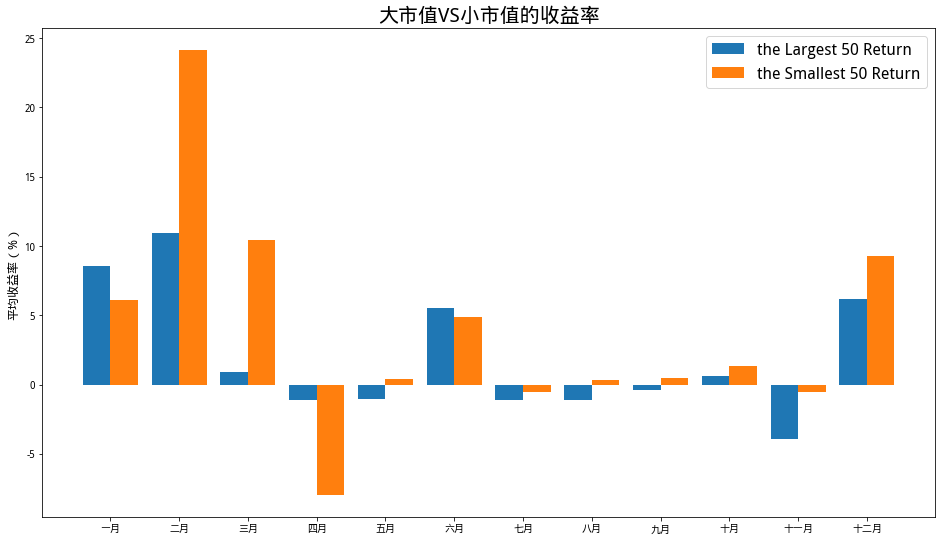

In [27]:
# 可视化
import matplotlib.pyplot as plt
import numpy as np

x_ticks=np.arange(1, 13)
monthLabel=['一月','二月','三月','四月','五月','六月','七月','八月','九月','十月','十一月','十二月']
barwidth=0.4

plt.figure(figsize=(16,9))
plt.bar(x_ticks-0.2, monthly_return_upper50_mean, label='the Largest 50 Return', width=barwidth)
plt.bar(x_ticks+0.2, monthly_return_lower50_mean, label='the Smallest 50 Return', width=barwidth)
plt.ylabel('平均收益率（%）', fontsize=12)
plt.xticks(x_ticks, monthLabel)

plt.legend(fontsize=16)
plt.title('大市值VS小市值的收益率', fontsize=20)
plt.show()
